# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Exploring Data

### Reading Data

In [2]:
df = pd.read_csv("train.csv")

### Acessing Data

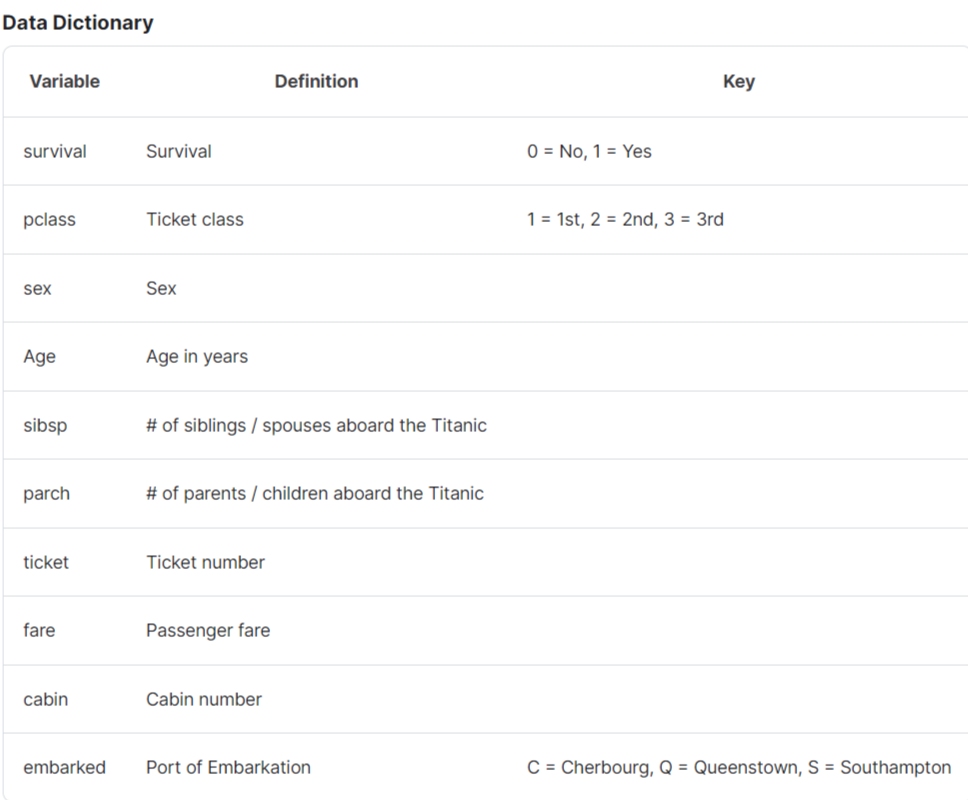

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [42]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,445.618243,0.381757,2.313063,29.298323,0.524775,0.381757,30.582164
std,257.405474,0.486091,0.834007,13.298900,1.104186,0.806949,41.176366
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,2.000000,21.750000,0.000000,0.000000,7.895800
50%,445.500000,0.000000,3.000000,26.507589,0.000000,0.000000,14.454200
75%,667.250000,1.000000,3.000000,36.000000,1.000000,0.000000,30.771850
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,263.000000


In [44]:
df.describe(include='object')

,Sex,Embarked
count,888,886
unique,2,3
top,male,S
freq,575,644


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.duplicated().sum()

0

### Cleaning Data

In [7]:
# Remove unneeded columns
df = df.drop(columns=['Name','Ticket','Cabin','PassengerId'])

In [ ]:
# Fill and Remove Null values
df.dropna(subset='Embarked')

In [9]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64

In [15]:
df.groupby(['Pclass','Sex']).Age.mean()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [16]:
df['Age'] = df.groupby(["Pclass","Sex"]).Age.apply(lambda x :x.fillna(x.mean()))

### Removing Outliers

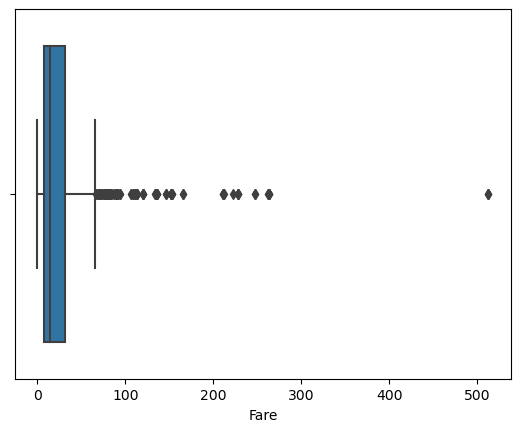

In [28]:
sns.boxplot(data=df,x='Fare');

In [29]:
# Removing outiers in Fare
df = df[df['Fare']<400]

### Creating Columns

In [19]:
# Create age group to be easier for anaylsis
df["Age_Group"] = pd.cut(df.Age,bins = [0,17,30,45,82],labels = ['Child','Young','Adult','Senior'])

In [41]:
df['Fare_Group'] = pd.cut(df.Fare,bins = [-0.9,8,15,35,265],labels=['low','medium','high','very high'])

### Univariate analysis

In [48]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Age_Group', 'Fare_Group'],
      dtype='object')

In [62]:
def count_insights(i):
    """
    This Function shows percentage of unique value and plot them in given variable
    input : column in data frame
    output: percentage of unique value and a plot for them
    """
    print(df[i].value_counts(normalize=True)*100)
    plt.figure(figsize=(7,4))
    plt.title(i)
    sns.countplot(data = df , x = i )
    plt.show()

0    61.824324
1    38.175676
Name: Survived, dtype: float64


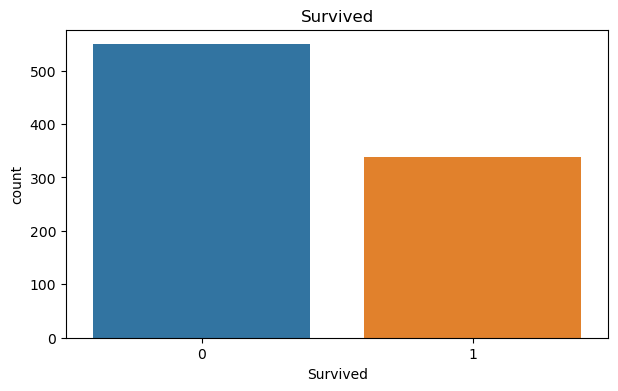

male      64.752252
female    35.247748
Name: Sex, dtype: float64


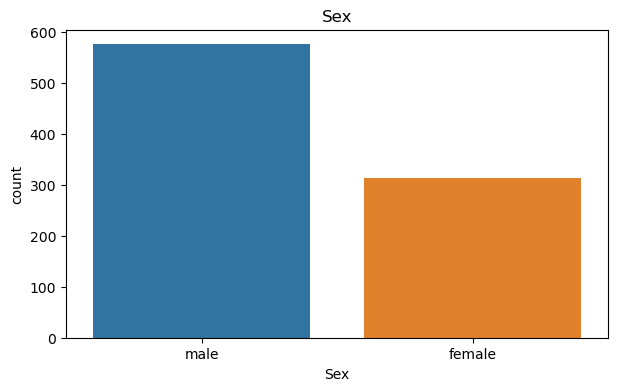

S    72.686230
C    18.623025
Q     8.690745
Name: Embarked, dtype: float64


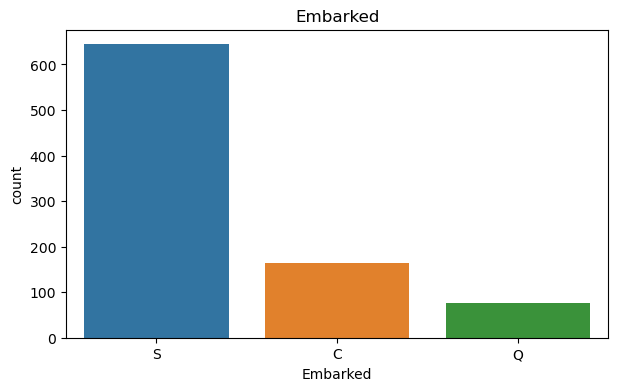

Young     48.873874
Adult     26.801802
Child     12.725225
Senior    11.599099
Name: Age_Group, dtype: float64


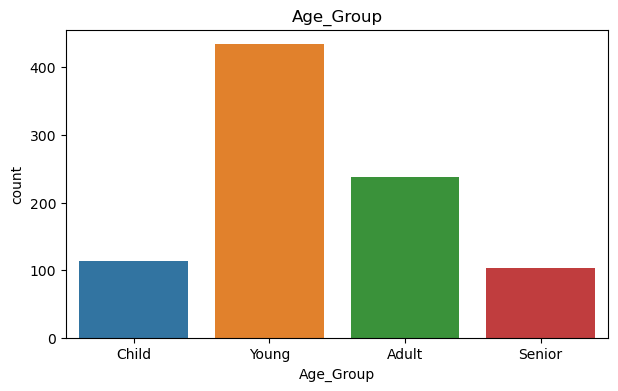

low          27.139640
high         26.463964
medium       24.436937
very high    21.959459
Name: Fare_Group, dtype: float64


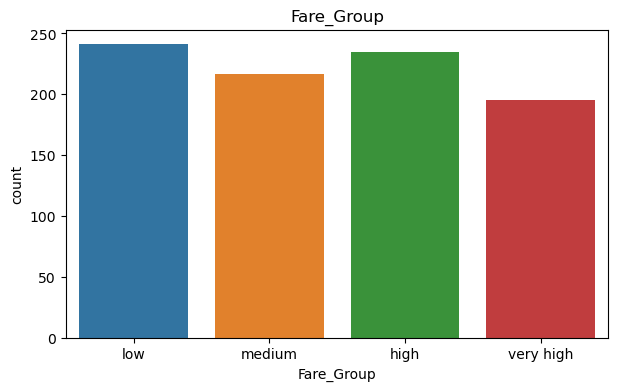

0    68.130631
1    23.536036
2     3.153153
4     2.027027
3     1.801802
8     0.788288
5     0.563063
Name: SibSp, dtype: float64


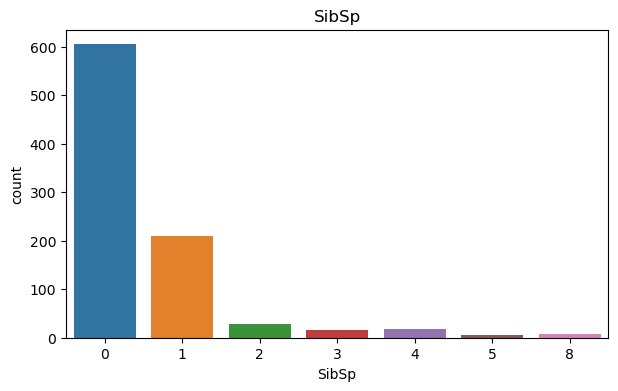

0    76.126126
1    13.175676
2     9.009009
5     0.563063
3     0.563063
4     0.450450
6     0.112613
Name: Parch, dtype: float64


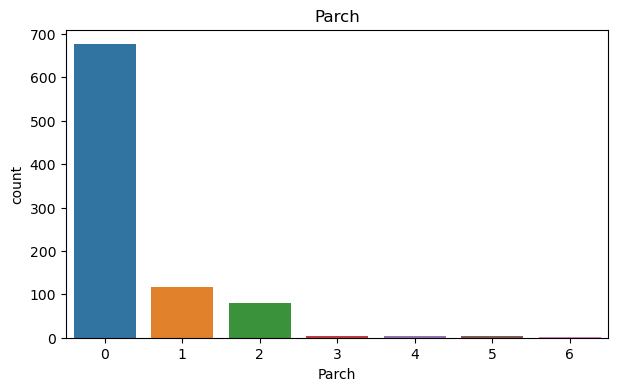

In [111]:
for i in ['Survived',"Sex",'Embarked','Age_Group','Fare_Group','SibSp','Parch'] :
    count_insights(i)

### Multivariate Analysis

In [97]:
def show_insighsts(i):
    print(df.groupby(i).Survived.mean()*100)
    plt.figure(figsize=(7,4))
    plt.title(f'{i} with survived')
    sns.barplot(data = df , x = i  , y='Survived',estimator=np.mean)
    plt.show()     
    
    

Sex
female    74.121406
male      18.608696
Name: Survived, dtype: float64


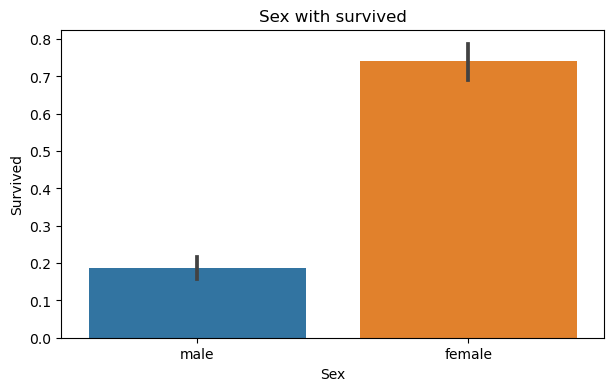

Embarked
C    54.545455
Q    38.961039
S    33.695652
Name: Survived, dtype: float64


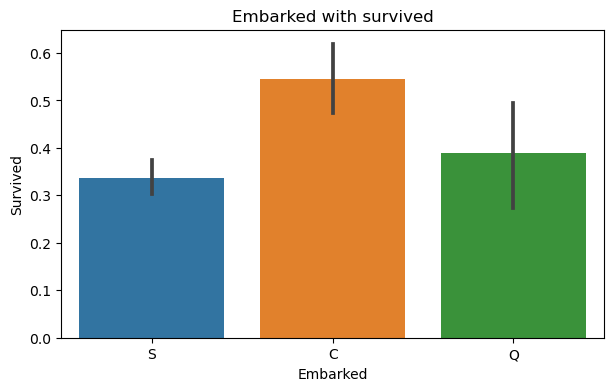

Age_Group
Child     53.982301
Young     32.488479
Adult     41.596639
Senior    36.893204
Name: Survived, dtype: float64


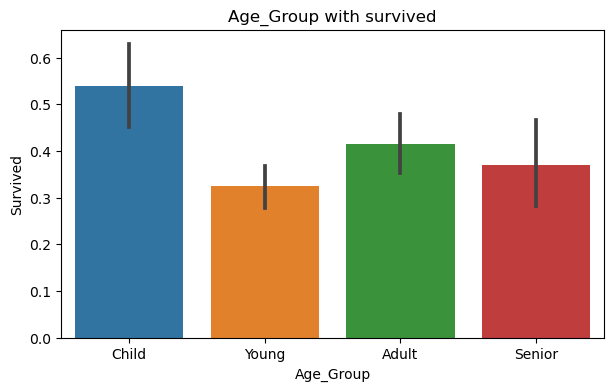

Fare_Group
low          21.576763
medium       28.571429
high         44.680851
very high    61.538462
Name: Survived, dtype: float64


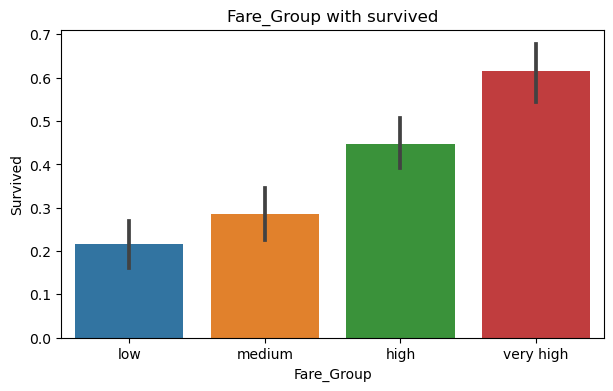

SibSp
0    34.214876
1    53.588517
2    46.428571
3    25.000000
4    16.666667
5     0.000000
8     0.000000
Name: Survived, dtype: float64


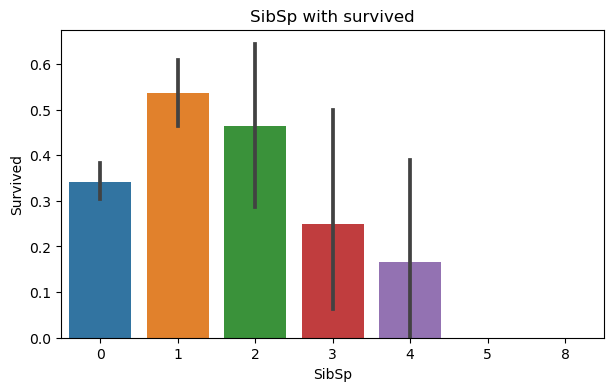

Parch
0    34.171598
1    54.700855
2    50.000000
3    60.000000
4     0.000000
5    20.000000
6     0.000000
Name: Survived, dtype: float64


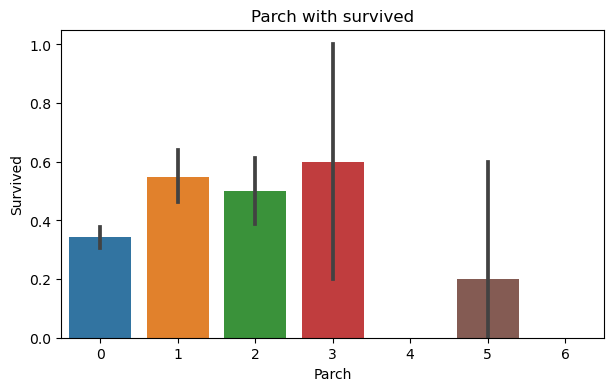

In [114]:
for i in ["Sex",'Embarked','Age_Group','Fare_Group','SibSp','Parch'] :
    show_insighsts(i)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

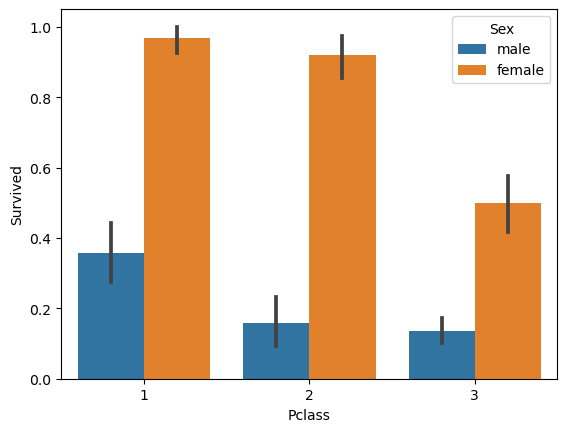

In [115]:
sns.barplot(data = df , x = 'Pclass'  , y='Survived',estimator=np.mean,hue='Sex')


<AxesSubplot:>

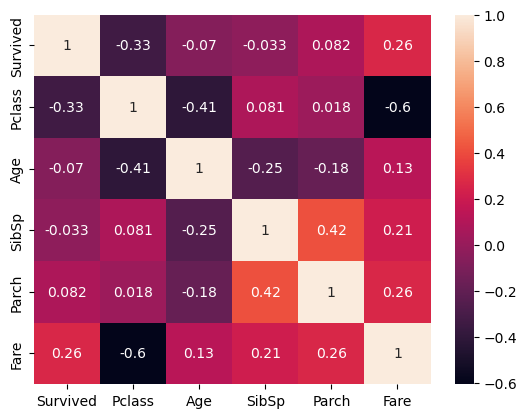

In [108]:
sns.heatmap(df.corr(),annot=True)

# Conclusion 

### From the above analysis we can see that:

### percentage of survivors is : 62% 
### percentage of survivors from men : 18% , from women : 74%

### The highest survival in Age Group is children with percentage : 54% and lowest is Young with : 32.5%
### The less number of childern or realtives you have , the more your chances of survival increase